# Практическая работа 1. Введение в Python

**Вариант 4. Чужая зарплата**  
Датасет: `4 Salary.csv`  
Поле для прогнозирования: **MonthlyIncome**  
Поле для классификации: **JobLevel**


## Часть 1. Подключение датасета

### Подключение библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

### Загрузка датасета

In [4]:
#Загрузка датасета 
df = pd.read_csv("4 Salary.csv")

#Просмотр первых строк
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


### Предобработка (пропуски и типы данных)

In [5]:
#Проверка пропусков
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


NumCompaniesWorked    19
TotalWorkingYears      9
dtype: int64

In [6]:
#Заполним пропуски в числовых колонках медианой (минимальная корректная предобработка для анализа)
num_cols_with_na = ["NumCompaniesWorked", "TotalWorkingYears"]
for col in num_cols_with_na:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

#Убедимся, что пропусков больше нет
df.isna().sum().sum()


np.int64(0)

### Вывод текстовой информации о датасете

In [7]:
print("Размер датасета (строки, столбцы):", df.shape)
print("\nСписок столбцов:")
print(df.columns.tolist())

print("\nТипы данных:")
display(df.dtypes)

print("\nПример данных (5 строк):")
display(df.head())

print("\nКраткая статистика по числовым полям:")
display(df.describe(include=[np.number]).T)


Размер датасета (строки, столбцы): (4410, 24)

Список столбцов:
['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Типы данных:


Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object


Пример данных (5 строк):


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4



Краткая статистика по числовым полям:


,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4410.0,2.691837,2.493912,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


## Часть 2. Визуализация данных

### Вывод графиков целевых полей

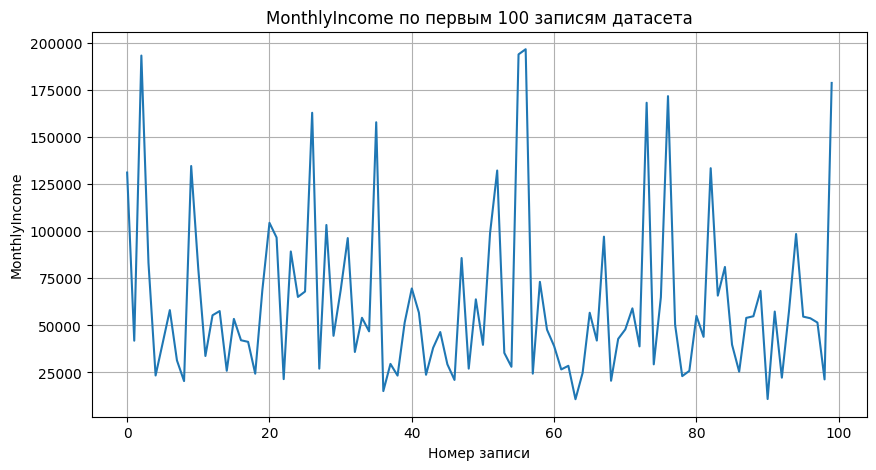

In [8]:
#Берём только первые 100 записей для визуализации
n = 100
y = df["MonthlyIncome"].iloc[:n].values

plt.figure(figsize=(10, 5))
plt.plot(y)
plt.title(f"MonthlyIncome по первым {n} записям датасета")
plt.xlabel("Номер записи")
plt.ylabel("MonthlyIncome")
plt.grid(True)
plt.show()


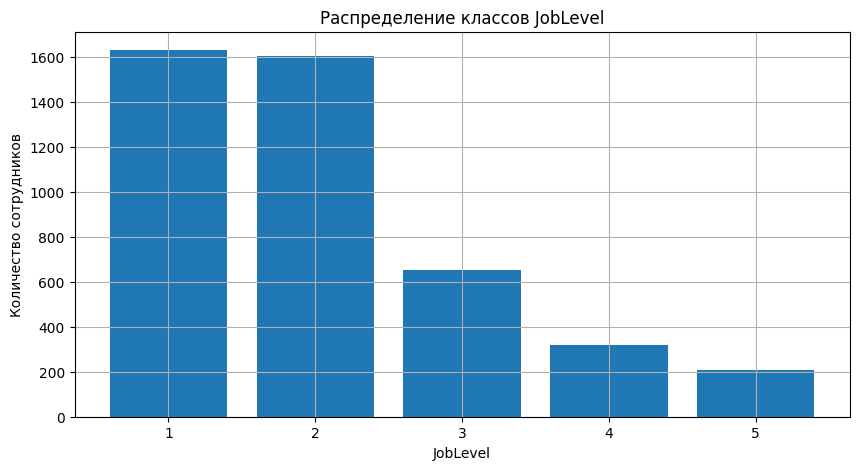

Классы JobLevel и их количество:


JobLevel
1    1629
2    1602
3     654
4     318
5     207
Name: count, dtype: int64

In [9]:
#Поле для классификации: JobLevel (гистограмма / распределение классов)
joblevel_counts = df["JobLevel"].value_counts().sort_index()

plt.figure()
plt.bar(joblevel_counts.index.astype(str), joblevel_counts.values)
plt.title("Распределение классов JobLevel")
plt.xlabel("JobLevel")
plt.ylabel("Количество сотрудников")
plt.show()

print("Классы JobLevel и их количество:")
display(joblevel_counts)


## Дополнительное задание
### Сравнение остальных полей для разных классов JobLevel
Ниже приведены **минимум 5** scatter-графиков, где цветом выделен класс `JobLevel`.


In [10]:
levels = sorted(df["JobLevel"].dropna().unique())

colors = plt.cm.tab10.colors
palette = {lvl: colors[i % len(colors)] for i, lvl in enumerate(levels)}

def scatter_by_joblevel(x_col, y_col="MonthlyIncome"):
    #Scatter-график: y_col vs x_col, цветом выделены классы JobLevel.
    plt.figure(figsize=(9, 5))
    for lvl in levels:
        tmp = df[df["JobLevel"] == lvl]
        plt.scatter(
            tmp[x_col],
            tmp[y_col],
            s=15,
            alpha=0.6,
            label=f"JobLevel {lvl}",
            color=palette[lvl]
        )
    plt.title(f"{y_col} vs {x_col} по классам JobLevel")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, alpha=0.3)
    plt.legend(title="JobLevel")
    plt.show()


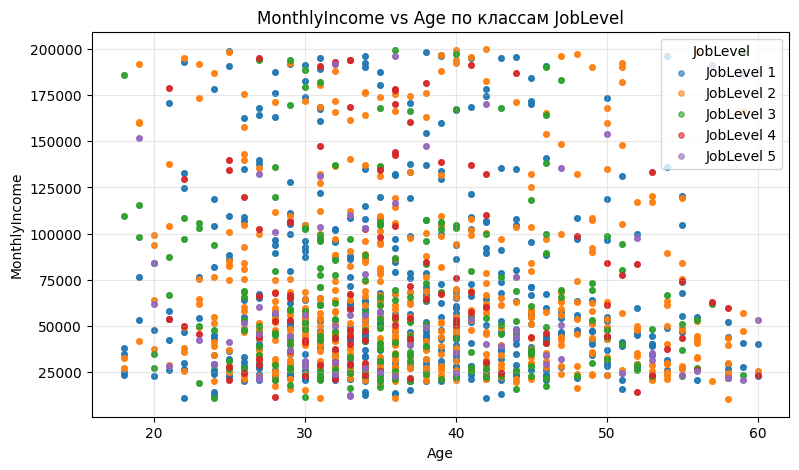

In [11]:
#Scatter: Age vs MonthlyIncome
scatter_by_joblevel("Age")


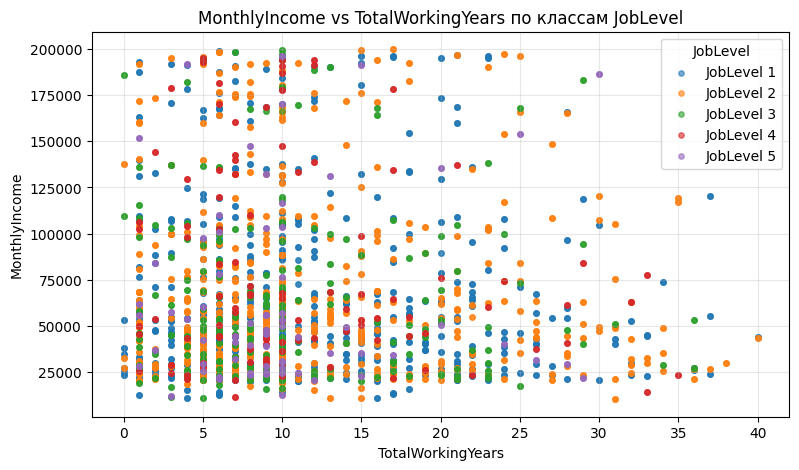

In [12]:
#Scatter: TotalWorkingYears vs MonthlyIncome
scatter_by_joblevel("TotalWorkingYears")


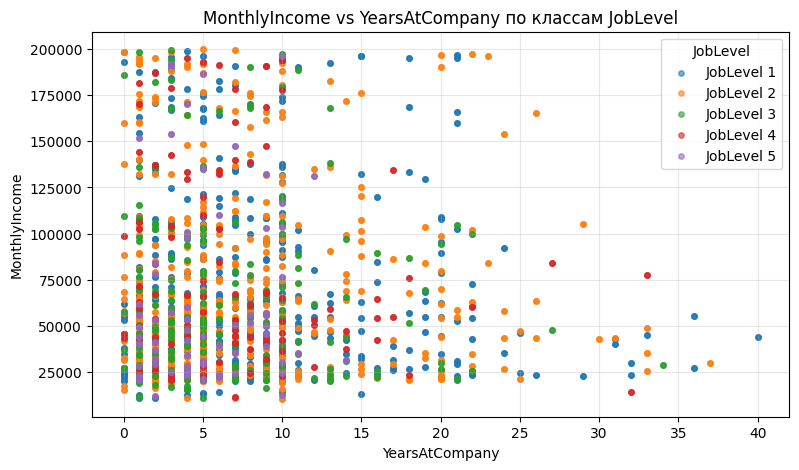

In [13]:
#Scatter: YearsAtCompany vs MonthlyIncome
scatter_by_joblevel("YearsAtCompany")


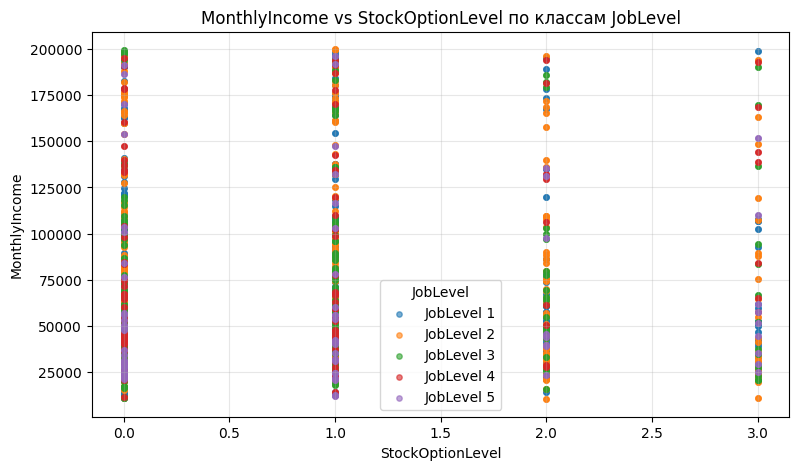

In [14]:
#Scatter: StockOptionLevel vs MonthlyIncome
scatter_by_joblevel("StockOptionLevel")


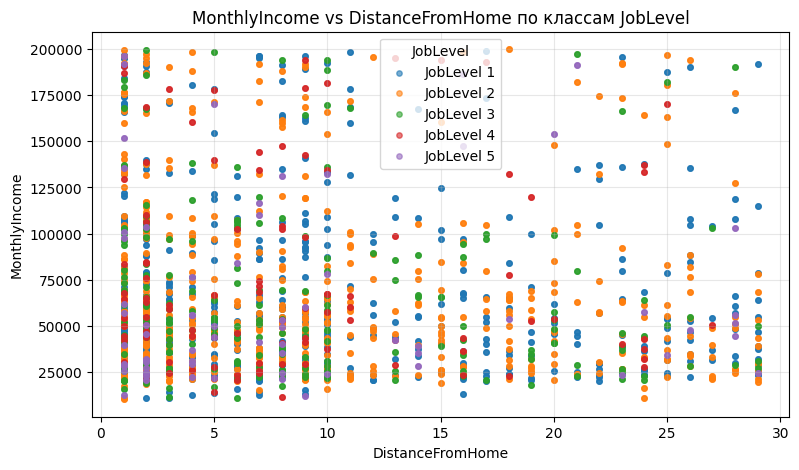

In [15]:
#Scatter: DistanceFromHome vs MonthlyIncome
scatter_by_joblevel("DistanceFromHome")


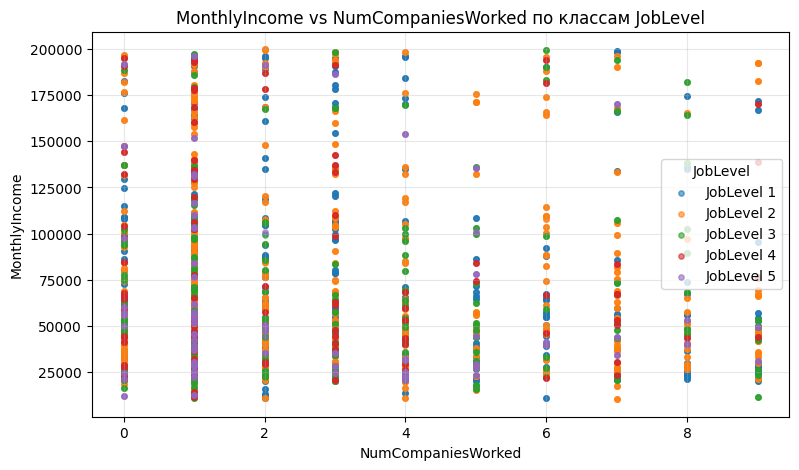

In [16]:
#Scatter (дополнительно): NumCompaniesWorked vs MonthlyIncome
scatter_by_joblevel("NumCompaniesWorked")


## Вывод по работе

В ходе выполнения работы был подключён и проанализирован датасет **Salary**, содержащий **4410 наблюдений** и **24 признака**, характеризующих сотрудников компании.  
В качестве целевой переменной для задачи **регрессии** был выбран показатель **MonthlyIncome**, а для задачи **классификации** — признак **JobLevel**, отражающий уровень должности сотрудника.

На этапе **предобработки данных** была выполнена проверка корректности типов данных и наличия пропусков, что обеспечило корректность дальнейшего статистического анализа и визуализации.

В рамках **визуального анализа** были построены графики распределения целевых признаков. Анализ распределения **JobLevel** показал, что данный признак является дискретным и характеризуется выраженным **дисбалансом классов**: наибольшее количество сотрудников относится к начальным уровням должностей, тогда как высокие уровни представлены существенно реже.

Анализ целевого признака **MonthlyIncome** выявил значительную вариативность доходов сотрудников, а также наличие выбросов. При этом визуализации (boxplot и scatter-графики) продемонстрировали устойчивую тенденцию роста дохода с увеличением уровня должности, что подтверждает ключевую роль признака **JobLevel** в формировании заработной платы.

В ходе **дополнительного сравнительного анализа** были исследованы взаимосвязи между **MonthlyIncome** и рядом числовых признаков с выделением классов **JobLevel**. Наиболее выраженная положительная связь с уровнем дохода наблюдается у показателей, связанных с профессиональным опытом и стажем работы, таких как **TotalWorkingYears** и **YearsAtCompany**. Менее выраженное, но заметное влияние оказывает показатель **StockOptionLevel**. Признак **Age** также демонстрирует положительную связь с доходом, однако её сила уступает показателям, напрямую отражающим профессиональный опыт. В то же время признаки, связанные с расстоянием до работы и количеством ранее сменённых компаний, не показали выраженной зависимости с уровнем дохода.
